In [1]:
import pandas as pd 
from tqdm import tqdm 
import re
from torch.utils.data import Dataset, DataLoader

import torch 
from torch import nn


In [2]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns 

In [3]:
train_df = pd.read_csv('dfe_train.csv')
test_df = pd.read_csv('dfe_test.csv')
val_df = pd.read_csv('dfe_val.csv')

In [4]:
X_train = train_df.drop(['sentiment'], axis = 1)
y_train = train_df['sentiment']

X_val = val_df.drop(['sentiment'], axis = 1)
y_val = val_df['sentiment']

X_test = test_df.drop(['sentiment'], axis = 1)
y_test = test_df['sentiment']

<h1> Random Forest </h1>

Accuracy:  0.8029
Average Sentence Duration (Random forest):  266.501614


<Axes: >

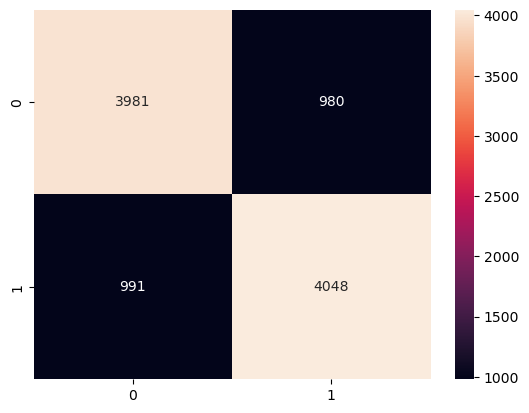

In [8]:
# import ensemble  
from sklearn import ensemble
from datetime import datetime
from sklearn.metrics import confusion_matrix, accuracy_score

# random forest
model_rf = ensemble.RandomForestClassifier(random_state=1, max_depth = 32, min_samples_leaf = 8)

# start time 
start = datetime.now()

# train
model_rf.fit(X_train, y_train)

# predict sentiment on testset
pred_rf = model_rf.predict(X_test)

# confusion matrix 
cm_rf = confusion_matrix(y_test, pred_rf)

# end time 
end = datetime.now()

# accuracy of model 
acc = accuracy_score(y_test, pred_rf)
print("Accuracy: ", acc)
duration = ((end - start).total_seconds())
print("Average Sentence Duration (Random forest): ", duration)

# confusion matrix plot
sns.heatmap(cm_rf, annot=True, fmt="d")

<h1> XGBoost </h1>

Accuracy (GradientBoosting):  0.8129
Average Sentence Duration (Gradient Boosting):  1614.634952


<Axes: >

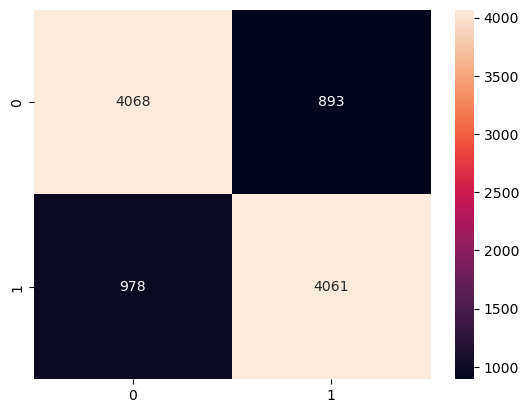

In [22]:
# import ensemble  
from sklearn import ensemble
from sklearn.metrics import confusion_matrix, accuracy_score

# gradient boosting
model_gb = ensemble.GradientBoostingClassifier(random_state=1)

# start time 
start = datetime.now()

# train 
model_gb.fit(X_train, y_train)

# predict sentiment on testset 
pred_gb = model_gb.predict(X_test)

# confusion matrix 
cm_gb = confusion_matrix(y_test, pred_gb)

# end time 
end = datetime.now()

# accuracy of model 
acc = accuracy_score(y_test, pred_gb)
print("Accuracy (GradientBoosting): ", acc)
duration = ((end - start).total_seconds())
print("Average Sentence Duration (Gradient Boosting): ", duration)

# confusion matrix plot
sns.heatmap(cm_gb, annot=True, fmt="d")